# Proyecto 3: Agrupación de datos sobre obesidad
## Integrantes
*
**Jonathan Alonso**
*
**Jheison Torres**

El objetivo es estimar el nivel de obesidad de individuos de Mexico, Peru y Colombia basado en los hábitos alimenticios y su condición física. A continuación se presentan los atributos.

| Atributo                                      | Descripción                                                                                                                                     |
|:--------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------|
| Consumo frecuente de alimentos altos en calorías (FAVC) | Consumo frecuente de alimentos altos en calorías                                                                                                |
| Frecuencia de consumo de vegetales (FCVC)               | Frecuencia de consumo de vegetales                                                                                                              |
| Número de comidas principales (NCP)                     | Número de comidas principales al día                                                                                                            |
| Consumo de alimentos entre comidas (CAEC)               | Consumo de alimentos entre las comidas principales                                                                                              |
| Consumo diario de agua (CH20)                           | Cantidad diaria de agua consumida                                                                                                               |
| Consumo de alcohol (CALC)                               | Frecuencia del consumo de alcohol                                                                                                               |
| Monitoreo de consumo de calorías (SCC)                  | Monitoreo de las calorías consumidas                                                                                                            |
| Frecuencia de actividad física (FAF)                    | Frecuencia de actividad física realizada                                                                                                        |
| Tiempo usando dispositivos tecnológicos (TUE)           | Tiempo dedicado al uso de dispositivos tecnológicos                                                                                             |
| Medio de transporte usado (MTRANS)                      | Medio de transporte utilizado                                                                                                                   |
| Género                                                  | Género de la persona                                                                                                                            |
| Edad                                                    | Edad de la persona                                                                                                                              |
| Altura                                                  | Altura de la persona                                                                                                                            |
| Peso                                                    | Peso de la persona                                                                                                                              |
| Antecedentes familiares de sobrepeso                    | Antecedentes de sobrepeso en la familia                                                                                                         |
| Fuma                                                    | Fumador o no                                                                                                                                    |
| NObesidad                                               | Nivel de obesidad: Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III |


In [2]:
#importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
#cargar dataset
df=pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
#valida primeros registros
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [5]:
#informacion DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
#cantidad de filas y columnas
df.shape

(2111, 17)

En total tenemos 2111 registros y 17 columnas

In [7]:
#variables categoricas
categoricas=df.select_dtypes(include=['object']).columns.tolist()
print('Variables cualitativas:', categoricas)

#variables numericas
numericas=df.select_dtypes(include=['float64']).columns.tolist()
print('Variables numericas:', numericas)

Variables cualitativas: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Variables numericas: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


Dentro de las variables tenemos:
### Cualitativas
* Gender
* family_history_with_overweight
* FAVC
* CAEC
* SMOKE
* SCC
* CALC
* MTRANS
* NObeyesdad

### Numericas
* Age
* Height
* Weight
* FCVC
* NCP
* CH2O
* FAF
* TUE

### A su vez podemos distribuir los atributos relacionados con los hábitos alimenticios:

* Consumo frecuente de alimentos altos en calorías (FAVC)
* Frecuencia de consumo de vegetales (FCVC)
* Número de comidas principales (NCP)
* Consumo de alimentos entre comidas (CAEC)
* Consumo diario de agua (CH20)
* Consumo de alcohol (CALC)
  
### Los atributos relacionados con la condición física son:

* Monitoreo de consumo de calorías (SCC)
* Frecuencia de actividad física (FAF)
* Tiempo usando dispositivos tecnológicos (TUE)
* Medio de transporte usado (MTRANS)
  
### Otros atributos son:
* Género
* Edad
* Altura
* Peso
* Antecedentes familiares de sobrepeso
* Fuma
* Nivel de obesidad: Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III

In [8]:
#valida estadisticos
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

Observando las estadísticas descritas anteriormente, se identifca que las variables Edad, peso, FCVC y NCP presentan asímetria. Por otra parte, el promedio de la edad es 24.3 y el peso es de 86.58.

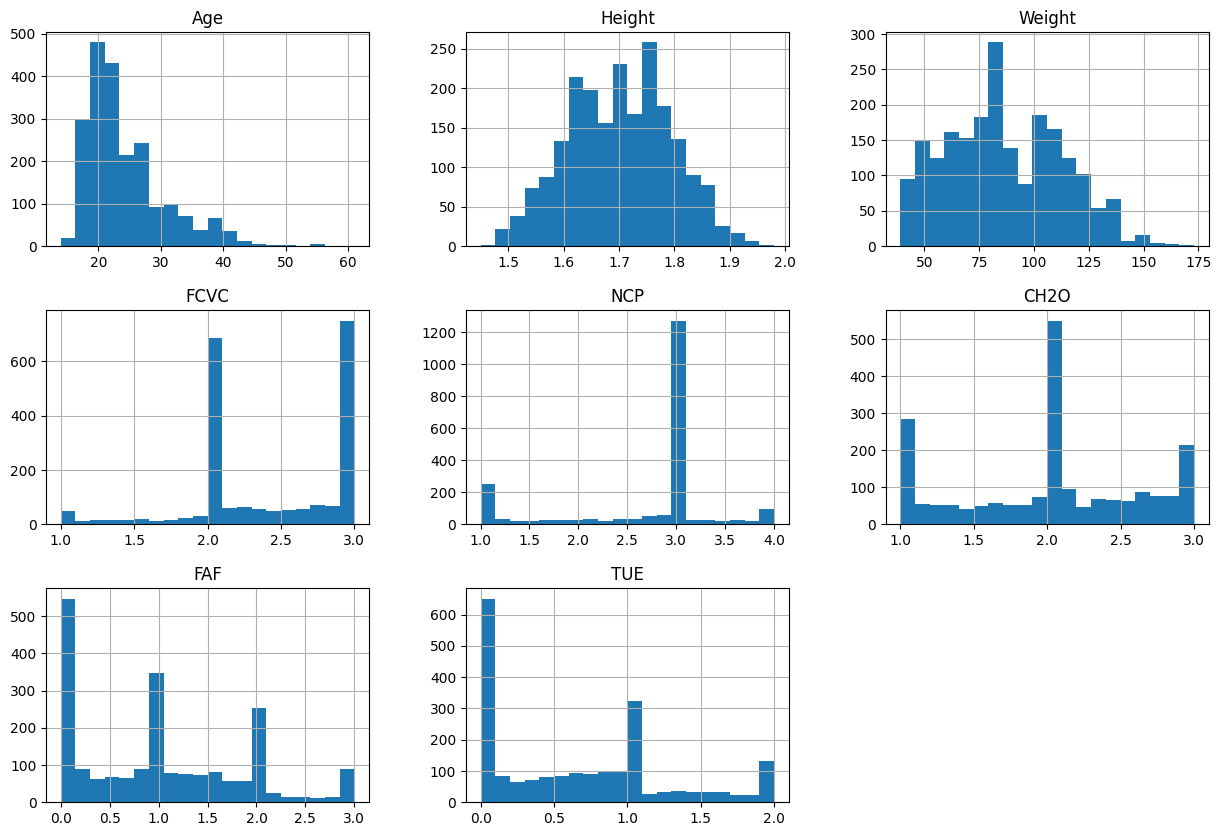

In [13]:
#histograma
df.hist(figsize=(15,10), bins=20)
plt.show()

Los diagramas anteriores representan la frecuencia de cada valor continuo.

* Tenemos un número máximo de personas entre 20 y 30 años.
* La frecuencia de la actividad física varía y hay muy pocas personas que hacen ejercicio a diario.
* Más de 1200 personas prefieren tres comidas principales.
* La frecuencia del consumo de vegetales es alta.

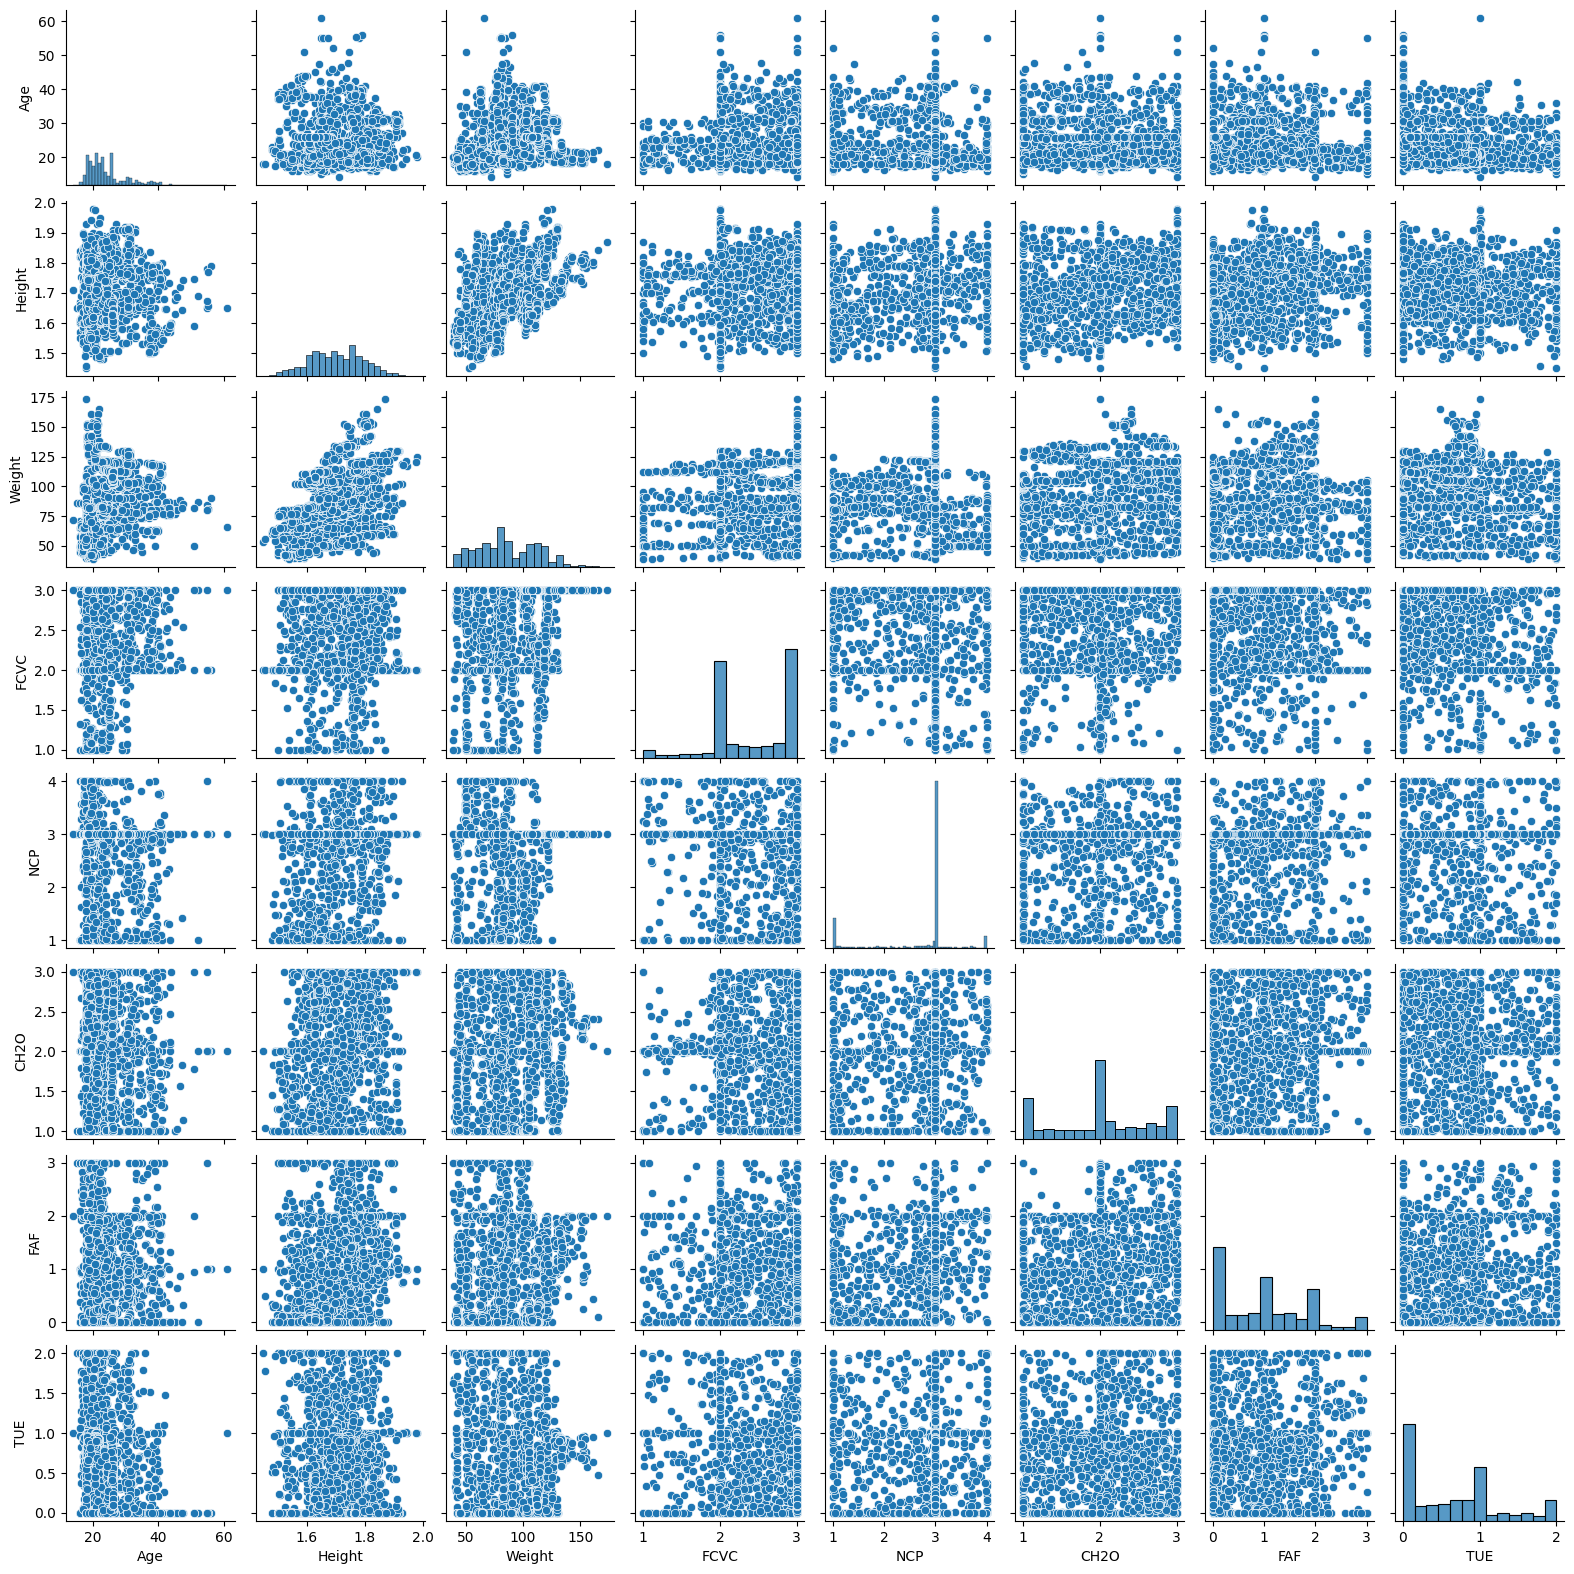

In [12]:
sns.pairplot(df, height=2)
plt.show()

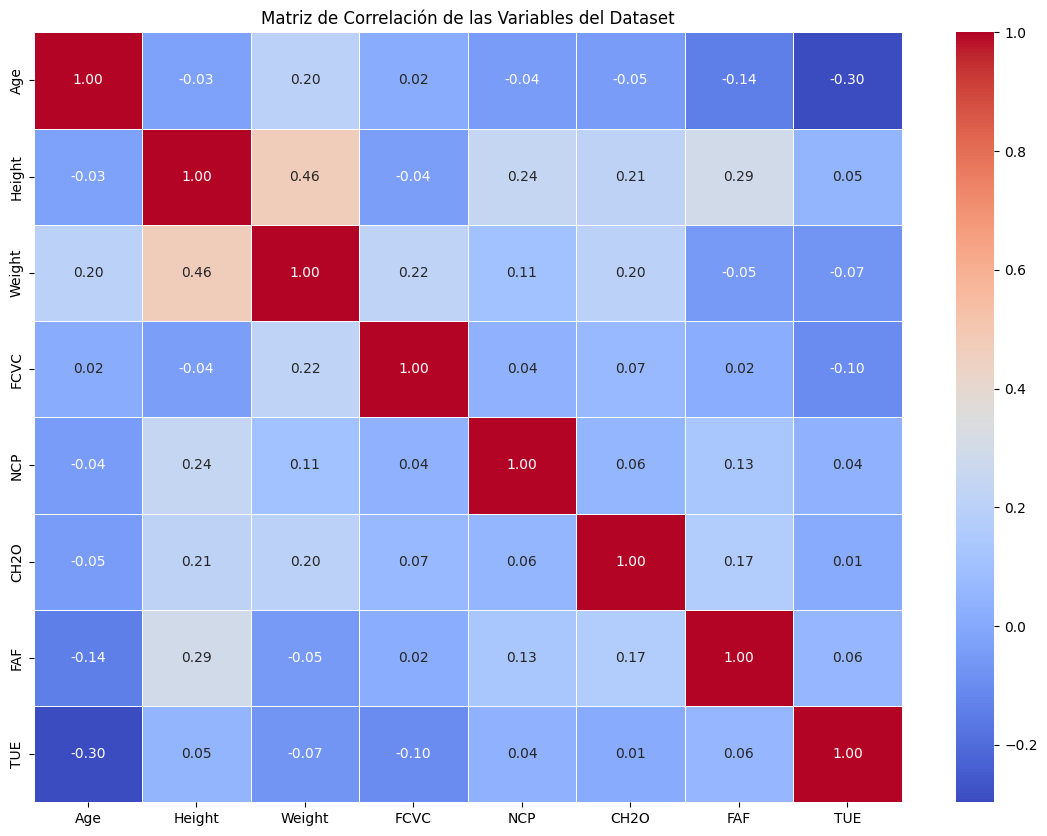

In [14]:
# Calcular la matriz de correlación
correlation_matrix = df[numericas].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 10))

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Matriz de Correlación de las Variables del Dataset")
plt.show()


Se evidencia a través de los gráficos anteriores que existe una correlación entre las variables Height y Weight.

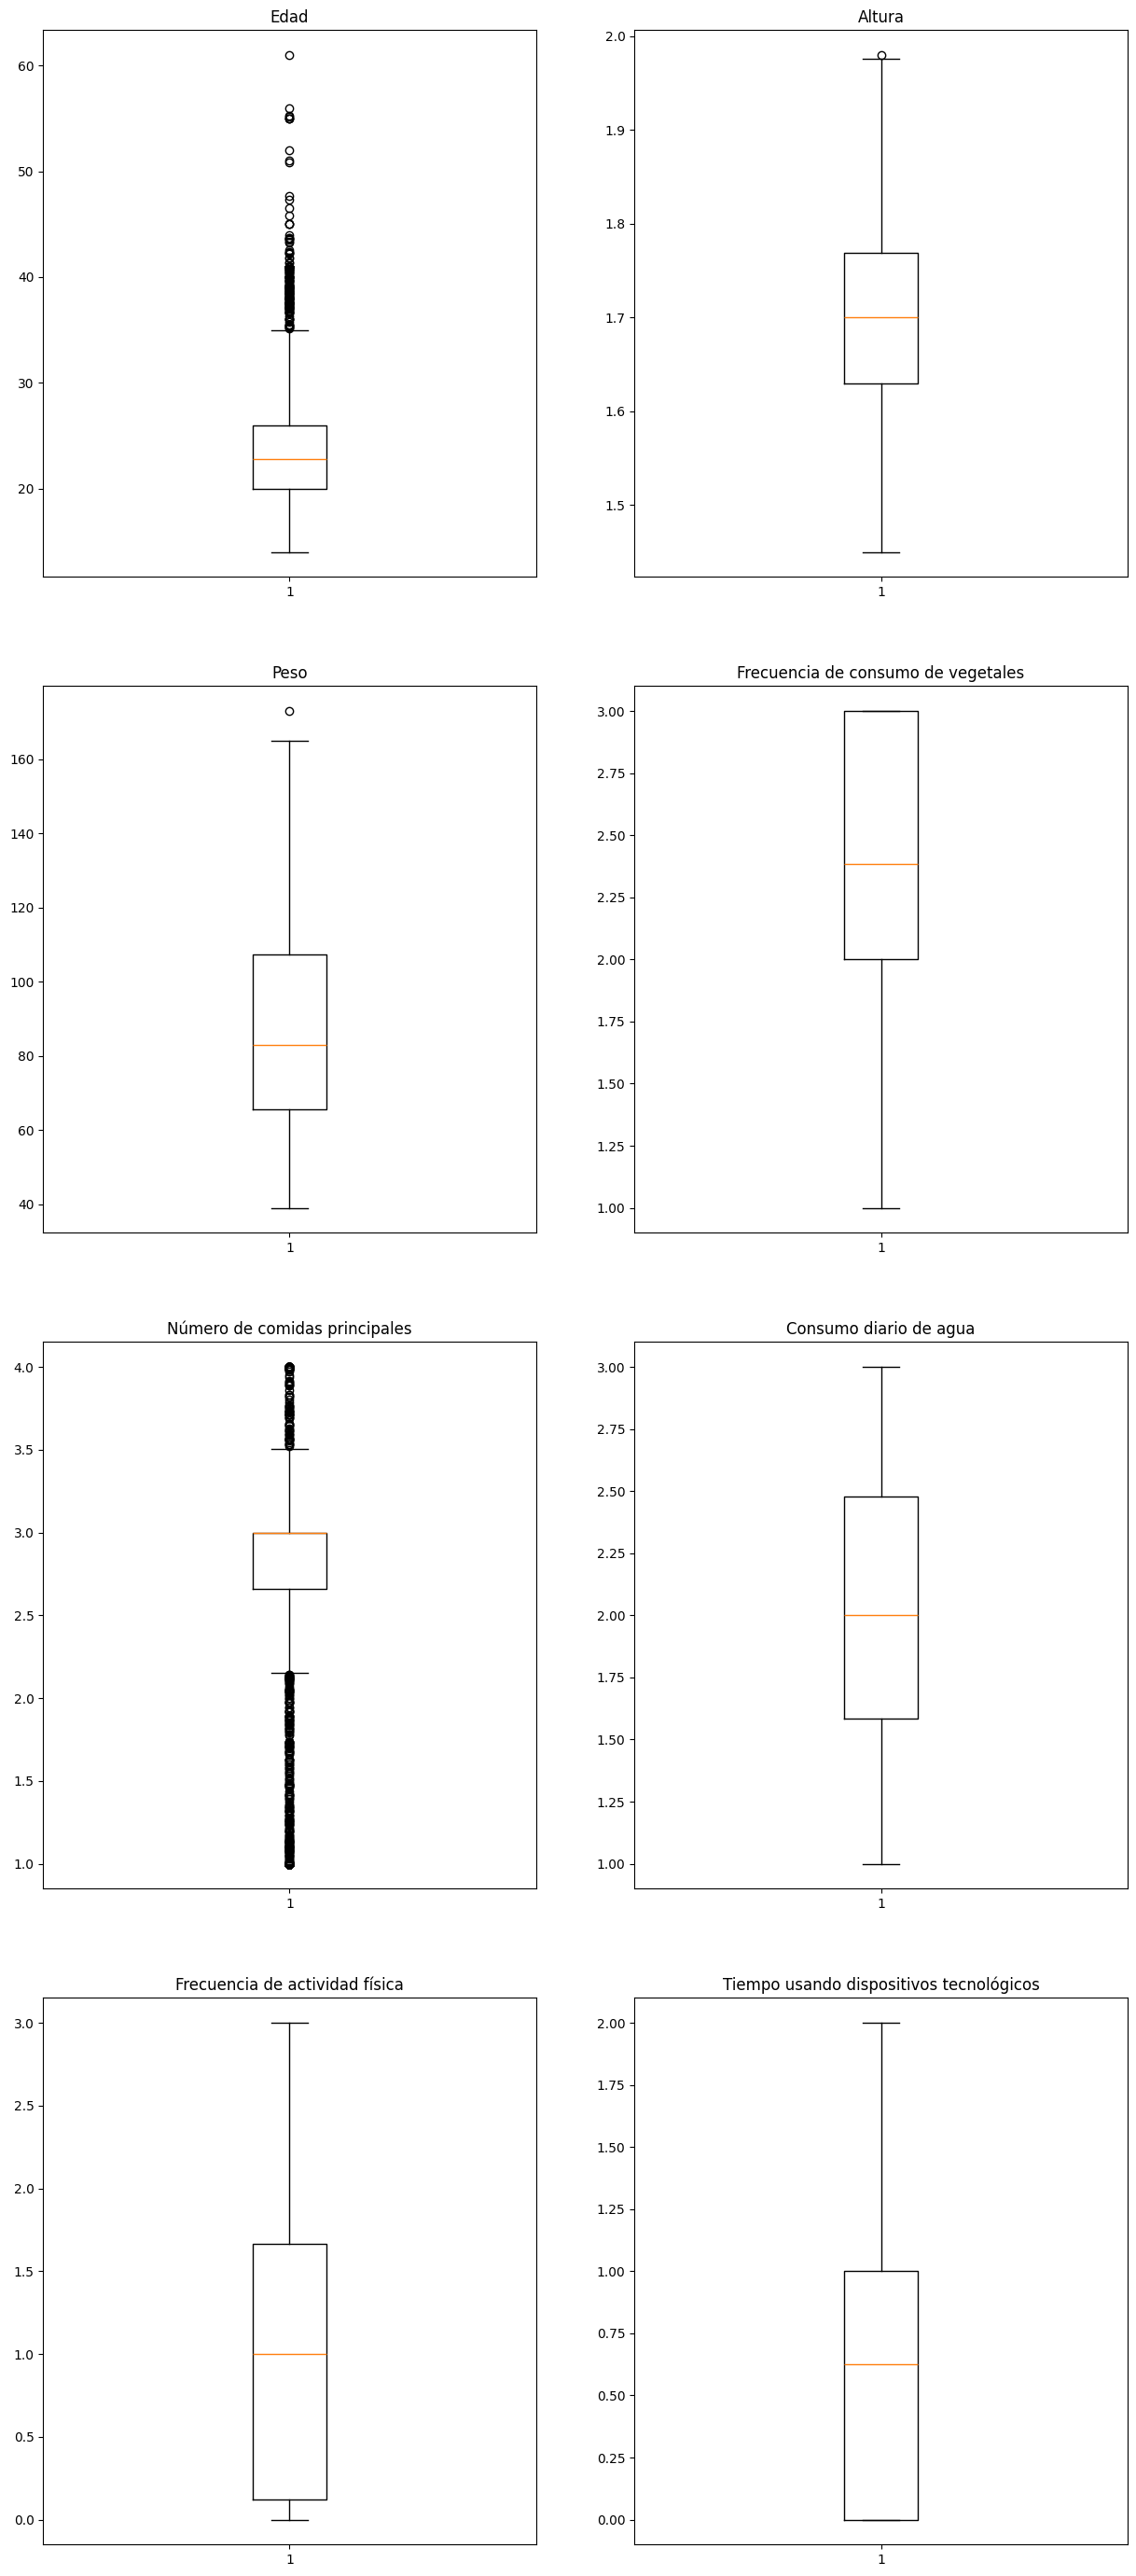

In [15]:
# Box plot
plt.figure(figsize=(15,35))
plt.subplot(4,2,1)
plt.boxplot(df.Age)
plt.title('Edad')
plt.subplot(4,2,2)
plt.boxplot(df.Height)
plt.title('Altura')
plt.subplot(4,2,3)
plt.boxplot(df.Weight)
plt.title('Peso')
plt.subplot(4,2,4)
plt.boxplot(df.FCVC)
plt.title('Frecuencia de consumo de vegetales')
plt.subplot(4,2,5)
plt.boxplot(df.NCP)
plt.title('Número de comidas principales')
plt.subplot(4,2,6)
plt.boxplot(df.CH2O)
plt.title('Consumo diario de agua')
plt.subplot(4,2,7)
plt.boxplot(df.FAF)
plt.title('Frecuencia de actividad física')
plt.subplot(4,2,8)
plt.boxplot(df.TUE)
plt.title('Tiempo usando dispositivos tecnológicos')
plt.show()

El diagrama de caja anterior representa la visualización gráfica de valores atípicos en el conjunto de datos. Tenemos valores atípicos presentes en la columna de número de comidas principales, altura, peso y edad. 

In [16]:
#Frecuencia variable objetivo
obesidad_counts=df['NObeyesdad'].value_counts()
obesidad_counts

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

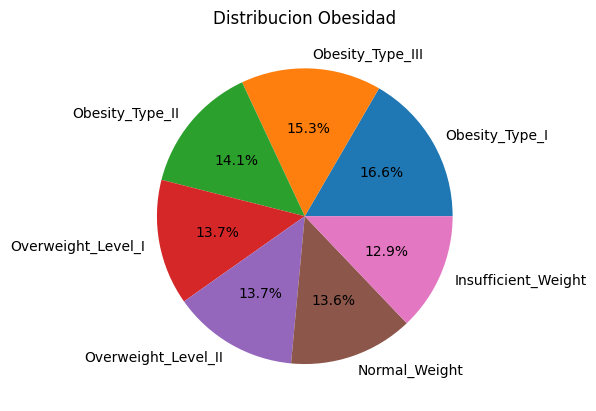

In [17]:
# Gráfico tipo pie
plt.pie(obesidad_counts, 
        labels=obesidad_counts.index, 
        autopct='%1.1f%%')
plt.title('Distribucion Obesidad')
plt.show()

Hipotesis
* H0: No hay relación entre la condición física y la obesidad.
* H1: Si hay relación entre la condición física y la obesidad.

### ESCENARIO 1: 
* Se excluyen unicamente los atributos 'Height','Weight' los cuáles presentaban una correlación alta entre ellas.

In [65]:
#Crea copia de dataframe 
df_copy=df.drop(['Height','Weight'], axis=1)
df_copy.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

In [66]:
df_copy.dtypes

Gender                             object
Age                               float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [67]:
from sklearn.preprocessing import OneHotEncoder

# Separar variables numéricas y categóricas
categorical_cols = df_copy.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('NObeyesdad')  # La variable objetivo se excluye del procesamiento aquí

# Aplicar One-Hot Encoding a las variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df_copy[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar variables numéricas y las variables categóricas codificadas
numerical_data = df_copy.select_dtypes(include=['float64'])
processed_data = pd.concat([numerical_data, encoded_df, df_copy['NObeyesdad']], axis=1)

# Mostrar el resultado del preprocesamiento
processed_data.head()


Age  FCVC  NCP  CH2O  FAF  TUE  Gender_Male  \
0  21.0   2.0  3.0   2.0  0.0  1.0          0.0   
1  21.0   3.0  3.0   3.0  3.0  0.0          0.0   
2  23.0   2.0  3.0   2.0  2.0  1.0          1.0   
3  27.0   3.0  3.0   2.0  2.0  0.0          1.0   
4  22.0   2.0  1.0   2.0  0.0  0.0          1.0   

   family_history_with_overweight_yes  FAVC_yes  CAEC_Frequently  ...  \
0                                 1.0       0.0              0.0  ...   
1                                 1.0       0.0              0.0  ...   
2                                 1.0       0.0              0.0  ...   
3                                 0.0       0.0              0.0  ...   
4                                 0.0       0.0              0.0  ...   

   SMOKE_yes  SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0        0.0      0.0              0.0             0.0      1.0          0.0   
1        1.0      1.0              0.0             1.0      0.0          0.0   
2        0.0      0.0              1.0             0.0      0.0          0.0   
3        0.0      0.0              1.0             0.0      0.0          0.0   
4        0.0      0.0              0.0             1.0      0.0          0.0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  \
0               0.0                           1.0             0.0   
1               0.0                           1.0             0.0   
2               0.0                           1.0             0.0   
3               0.0                           0.0             1.0   
4               0.0                           1.0             0.0   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II  

[5 rows x 22 columns]

In [68]:
#preprocesamiento
from sklearn.preprocessing import StandardScaler

X = processed_data.drop('NObeyesdad', axis=1)
y = df_copy['NObeyesdad']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

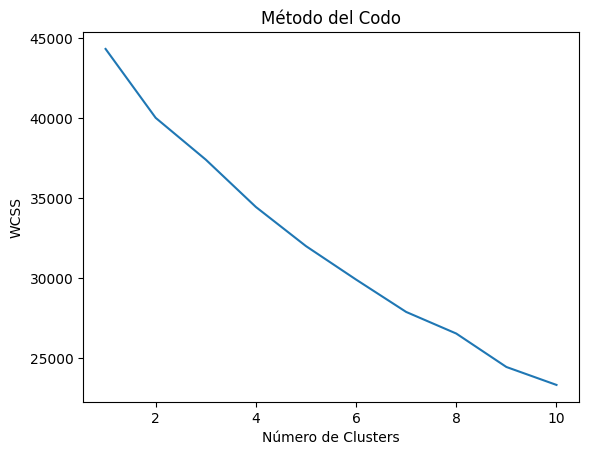

In [69]:
# Escoge numero de clusters (k)
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Grafica resultados metodo del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') 
plt.show()

De acuerdo con el método del codo, el número de cluster que se identifica es 2.

In [70]:
# numero de clusters
optimal_k = 2

# entrena modeloa
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

cluster_labels = kmeans.labels_

df_copy['Cluster'] = cluster_labels

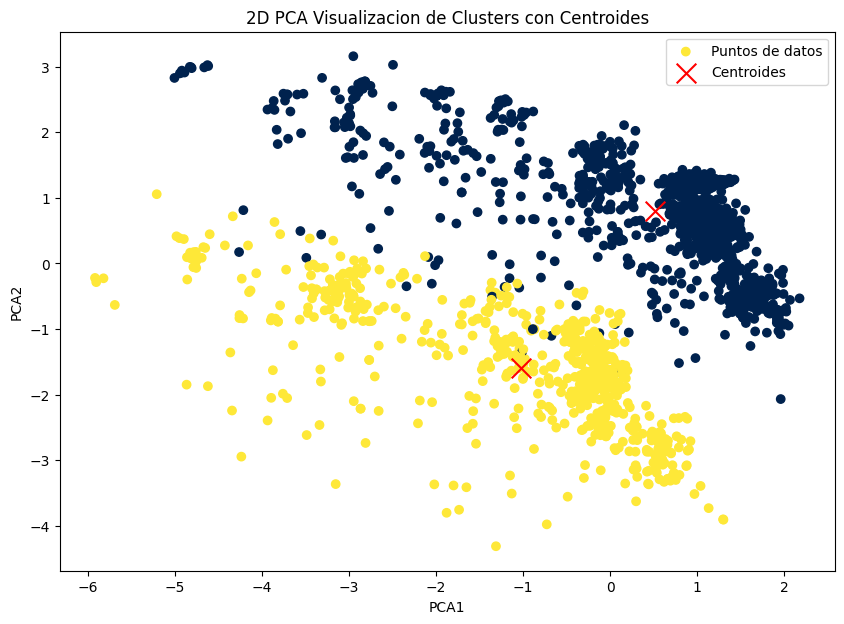

In [71]:
# inicializa PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# PCA inicializacion y transformacion
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='cividis', marker='o', label='Puntos de datos')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.title('2D PCA Visualizacion de Clusters con Centroides')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [72]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Definir k para clustering
k = 2

# Clustering K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"Coeficiente de Silueta para K-Means: {silhouette_kmeans:.4f}")

# Clustering Jerárquico
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_agg = agg.fit_predict(X_scaled)
silhouette_agg = silhouette_score(X_scaled, labels_agg)
print(f"Coeficiente de Silueta para Clustering Jerárquico: {silhouette_agg:.4f}")

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
mask = labels_dbscan != -1
if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
    print(f"Coeficiente de Silueta para DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN no encontró clústeres distintos.")

# Modelo de Mezcla Gaussiana
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
silhouette_gmm = silhouette_score(X_scaled, labels_gmm)
print(f"Coeficiente de Silueta para GMM: {silhouette_gmm:.4f}")

Coeficiente de Silueta para K-Means: 0.2973
Coeficiente de Silueta para Clustering Jerárquico: 0.2737
Coeficiente de Silueta para DBSCAN: 0.3036
Coeficiente de Silueta para GMM: 0.2940


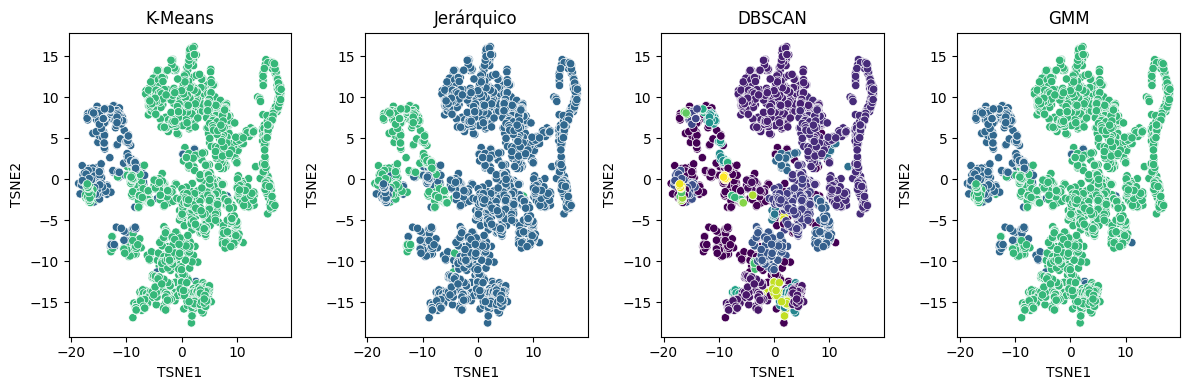

In [73]:
## Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'K-Means': labels_kmeans,
    'Jerárquico': labels_agg,
    'DBSCAN': labels_dbscan,
    'GMM': labels_gmm
})

# Visualizar los resultados
## Hagamos un Tsne para visualizar los resultados

from sklearn.manifold import TSNE
tsne=TSNE(n_components=3, random_state=42)
X_tsne=tsne.fit_transform(X_scaled)

results['TSNE1'] = X_tsne[:,0]
results['TSNE2'] = X_tsne[:,1]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='K-Means', palette='viridis', legend=False, data=results)
plt.title('K-Means')

plt.subplot(1, 4, 2)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Jerárquico', palette='viridis', legend=False, data=results)
plt.title('Jerárquico')

plt.subplot(1, 4, 3)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='DBSCAN', palette='viridis', legend=False, data=results)
plt.title('DBSCAN')

plt.subplot(1, 4, 4)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GMM', palette='viridis', legend=False, data=results)
plt.title('GMM')

plt.tight_layout()
plt.show()

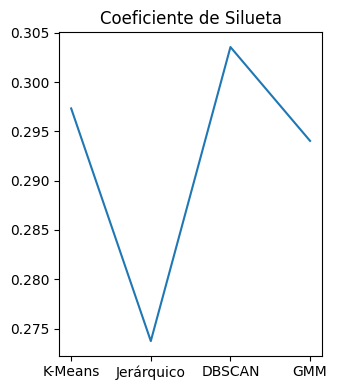

In [48]:
## Visualización de los Coeficientes de Silueta

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.lineplot(x=['K-Means', 'Jerárquico', 'DBSCAN', 'GMM'], y=[silhouette_kmeans, silhouette_agg, silhouette_dbscan, silhouette_gmm])

plt.title('Coeficiente de Silueta')

plt.tight_layout()
plt.show()

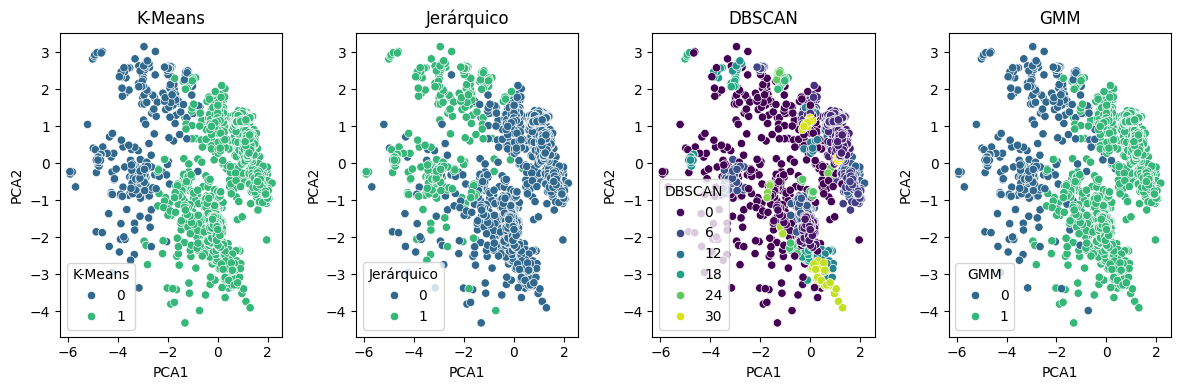

In [74]:
## Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'K-Means': labels_kmeans,
    'Jerárquico': labels_agg,
    'DBSCAN': labels_dbscan,
    'GMM': labels_gmm
})

# Visualizar los resultados
## Hagamos un PCA para visualizar los resultados

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

results['PCA1'] = X_pca[:,0]
results['PCA2'] = X_pca[:,1]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='K-Means', palette='viridis',  data=results)
plt.title('K-Means')

plt.subplot(1, 4, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Jerárquico', palette='viridis',  data=results)
plt.title('Jerárquico')

plt.subplot(1, 4, 3)
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN', palette='viridis',  data=results)
plt.title('DBSCAN')

plt.subplot(1, 4, 4)
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM', palette='viridis',  data=results)
plt.title('GMM')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Target')

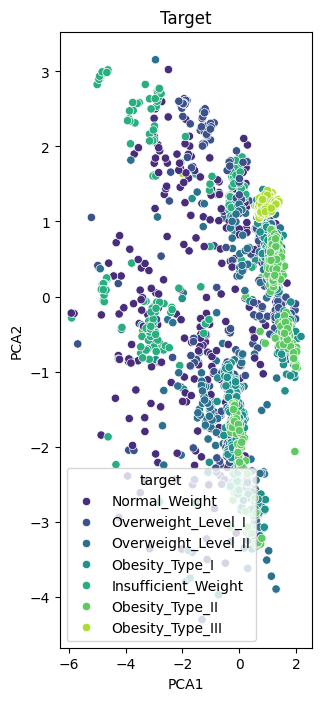

In [78]:
## Comparemos PCA con Target

results['target'] = y

plt.figure(figsize=(15, 8))

plt.subplot(1, 4, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='target', palette='viridis',  data=results)
plt.title('Target')

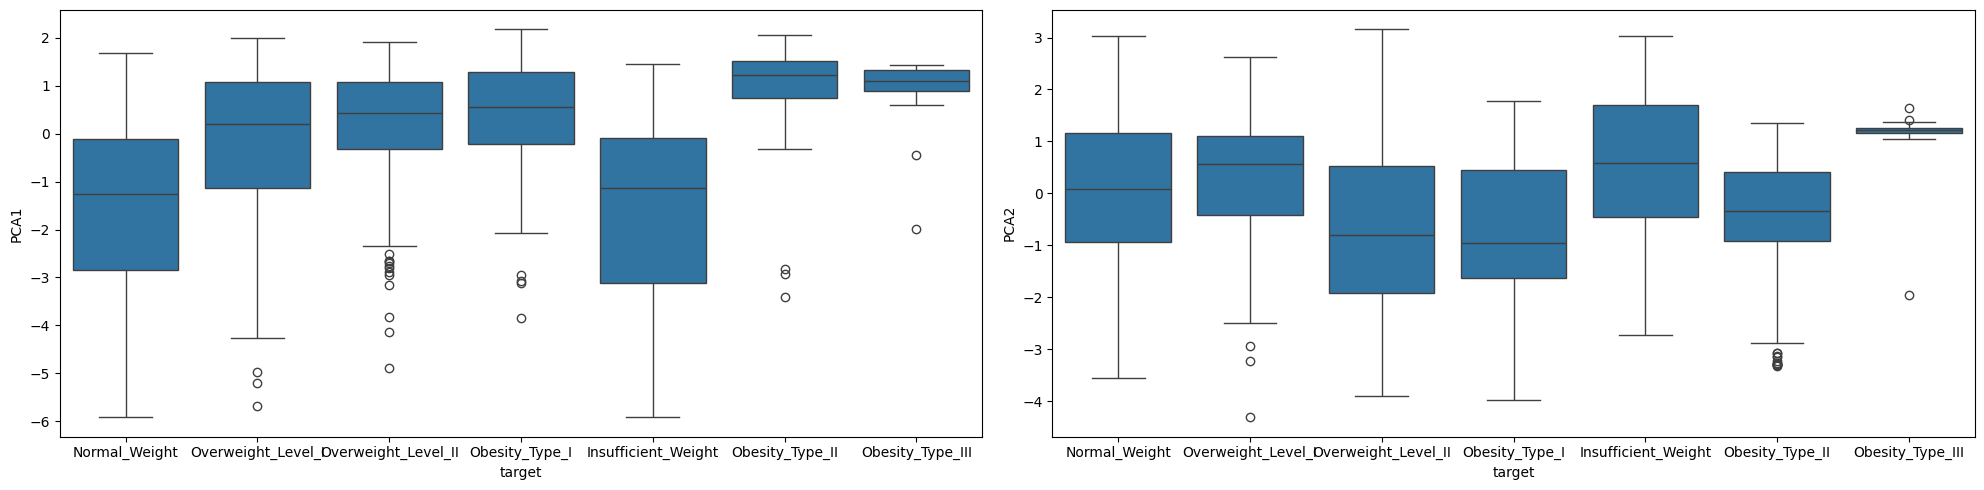

In [79]:
## Usemos un boxplot para comparar PCA con Target

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='PCA1', data=results)

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='PCA2', data=results)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'K-Means')

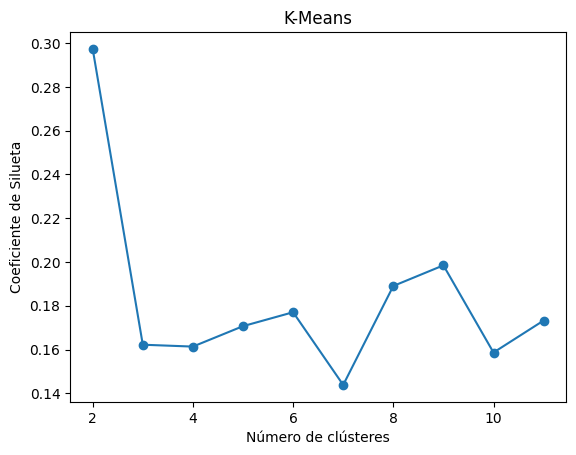

In [80]:
kmeans_silhouette = []
for k in range(10):
    kmeans = KMeans(n_clusters=k+2, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_scaled)
    silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
    kmeans_silhouette.append(silhouette_kmeans)

plt.plot(range(2, 12), kmeans_silhouette, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.title('K-Means')

## ESCENARIO 2: 
* Se inluyen únicamente aquellos parametros que se relacionan con los hábitos alimenticios y la condición física.

In [89]:
#Crea copia de dataframe 
df_copy1=df.drop(['Gender', 'family_history_with_overweight', 'SMOKE', 'Age', 'Height', 'Weight'], axis=1)
df_copy1.columns

Index(['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'MTRANS', 'NObeyesdad'],
      dtype='object')

In [90]:
from sklearn.preprocessing import OneHotEncoder

# Separar variables numéricas y categóricas
categorical_cols = df_copy1.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('NObeyesdad')  # La variable objetivo se excluye del procesamiento aquí

# Aplicar One-Hot Encoding a las variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df_copy1[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar variables numéricas y las variables categóricas codificadas
numerical_data = df_copy1.select_dtypes(include=['float64'])
processed_data = pd.concat([numerical_data, encoded_df, df_copy1['NObeyesdad']], axis=1)

# Mostrar el resultado del preprocesamiento
processed_data.head()


FCVC  NCP  CH2O  FAF  TUE  FAVC_yes  CAEC_Frequently  CAEC_Sometimes  \
0   2.0  3.0   2.0  0.0  1.0       0.0              0.0             1.0   
1   3.0  3.0   3.0  3.0  0.0       0.0              0.0             1.0   
2   2.0  3.0   2.0  2.0  1.0       0.0              0.0             1.0   
3   3.0  3.0   2.0  2.0  0.0       0.0              0.0             1.0   
4   2.0  1.0   2.0  0.0  0.0       0.0              0.0             1.0   

   CAEC_no  SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0      0.0      0.0              0.0             0.0      1.0          0.0   
1      0.0      1.0              0.0             1.0      0.0          0.0   
2      0.0      0.0              1.0             0.0      0.0          0.0   
3      0.0      0.0              1.0             0.0      0.0          0.0   
4      0.0      0.0              0.0             1.0      0.0          0.0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  \
0               0.0                           1.0             0.0   
1               0.0                           1.0             0.0   
2               0.0                           1.0             0.0   
3               0.0                           0.0             1.0   
4               0.0                           1.0             0.0   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [91]:
#preprocesamiento
from sklearn.preprocessing import StandardScaler

X = processed_data.drop('NObeyesdad', axis=1)
y = df_copy1['NObeyesdad']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

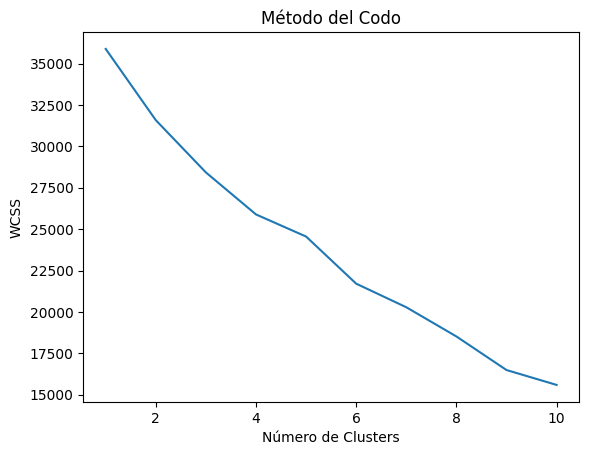

In [92]:
# Escoge numero de clusters (k)
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Grafica resultados metodo del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') 
plt.show()

In [95]:
# numero de clusters
optimal_k = 5

# entrena modeloa
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

cluster_labels = kmeans.labels_

df_copy1['Cluster'] = cluster_labels
df_copy1.head()

FAVC  FCVC  NCP       CAEC  CH2O  SCC  FAF  TUE        CALC  \
0   no   2.0  3.0  Sometimes   2.0   no  0.0  1.0          no   
1   no   3.0  3.0  Sometimes   3.0  yes  3.0  0.0   Sometimes   
2   no   2.0  3.0  Sometimes   2.0   no  2.0  1.0  Frequently   
3   no   3.0  3.0  Sometimes   2.0   no  2.0  0.0  Frequently   
4   no   2.0  1.0  Sometimes   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  Cluster  
0  Public_Transportation        Normal_Weight        0  
1  Public_Transportation        Normal_Weight        4  
2  Public_Transportation        Normal_Weight        0  
3                Walking   Overweight_Level_I        2  
4  Public_Transportation  Overweight_Level_II        4

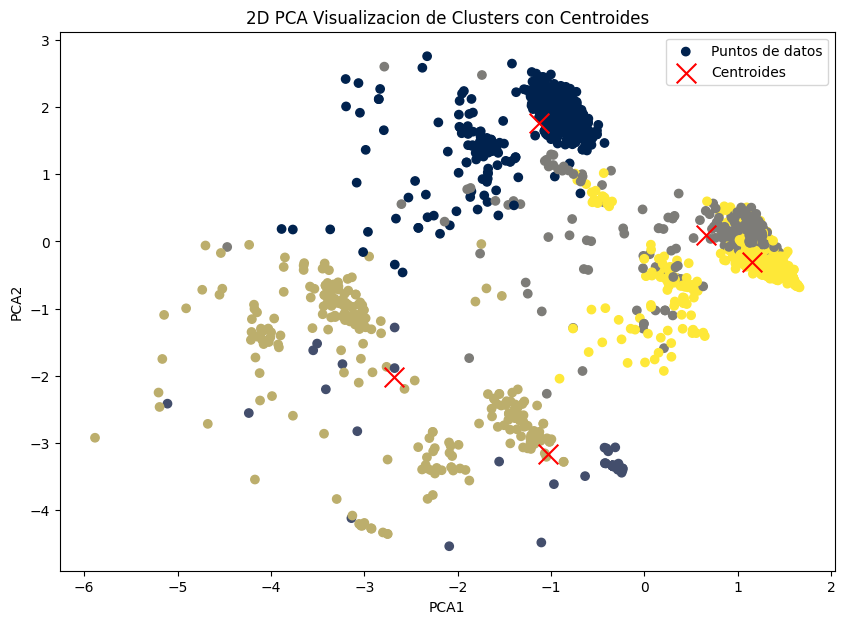

In [96]:
# inicializa PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# PCA inicializacion y transformacion
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='cividis', marker='o', label='Puntos de datos')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.title('2D PCA Visualizacion de Clusters con Centroides')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [97]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Definir k para clustering
k = 5

# Clustering K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"Coeficiente de Silueta para K-Means: {silhouette_kmeans:.4f}")

# Clustering Jerárquico
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_agg = agg.fit_predict(X_scaled)
silhouette_agg = silhouette_score(X_scaled, labels_agg)
print(f"Coeficiente de Silueta para Clustering Jerárquico: {silhouette_agg:.4f}")

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
mask = labels_dbscan != -1
if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
    print(f"Coeficiente de Silueta para DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN no encontró clústeres distintos.")

# Modelo de Mezcla Gaussiana
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
silhouette_gmm = silhouette_score(X_scaled, labels_gmm)
print(f"Coeficiente de Silueta para GMM: {silhouette_gmm:.4f}")

Coeficiente de Silueta para K-Means: 0.2515
Coeficiente de Silueta para Clustering Jerárquico: 0.2296
Coeficiente de Silueta para DBSCAN: 0.2776
Coeficiente de Silueta para GMM: 0.2515


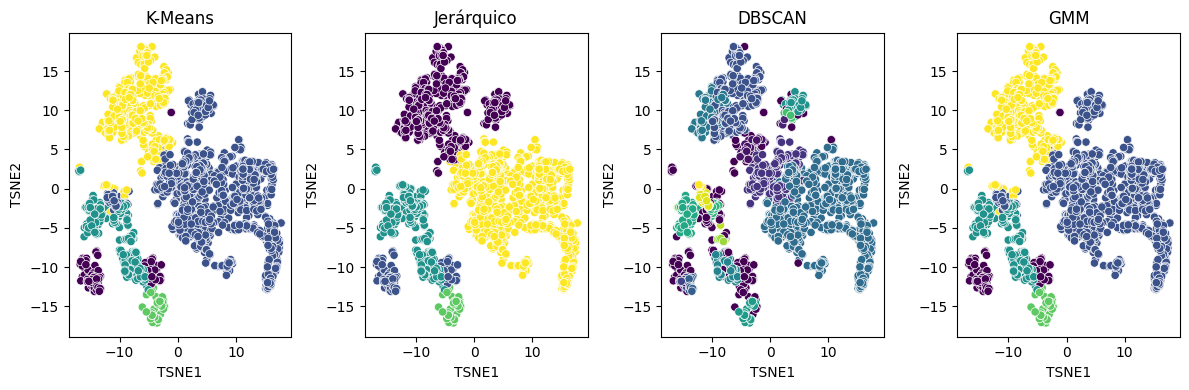

In [98]:
## Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'K-Means': labels_kmeans,
    'Jerárquico': labels_agg,
    'DBSCAN': labels_dbscan,
    'GMM': labels_gmm
})

# Visualizar los resultados
## Hagamos un Tsne para visualizar los resultados

from sklearn.manifold import TSNE
tsne=TSNE(n_components=3, random_state=42)
X_tsne=tsne.fit_transform(X_scaled)

results['TSNE1'] = X_tsne[:,0]
results['TSNE2'] = X_tsne[:,1]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='K-Means', palette='viridis', legend=False, data=results)
plt.title('K-Means')

plt.subplot(1, 4, 2)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Jerárquico', palette='viridis', legend=False, data=results)
plt.title('Jerárquico')

plt.subplot(1, 4, 3)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='DBSCAN', palette='viridis', legend=False, data=results)
plt.title('DBSCAN')

plt.subplot(1, 4, 4)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GMM', palette='viridis', legend=False, data=results)
plt.title('GMM')

plt.tight_layout()
plt.show()

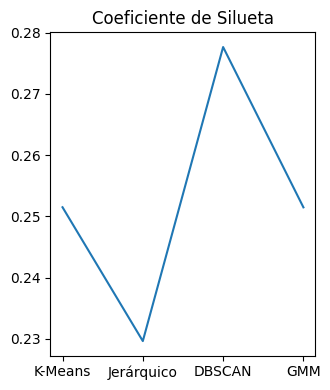

In [99]:
## Visualización de los Coeficientes de Silueta

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.lineplot(x=['K-Means', 'Jerárquico', 'DBSCAN', 'GMM'], y=[silhouette_kmeans, silhouette_agg, silhouette_dbscan, silhouette_gmm])

plt.title('Coeficiente de Silueta')

plt.tight_layout()
plt.show()

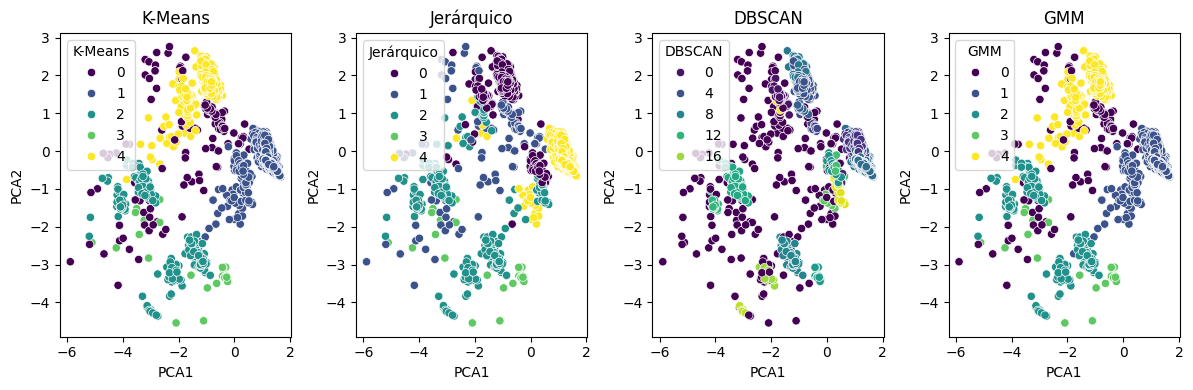

In [100]:
## Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'K-Means': labels_kmeans,
    'Jerárquico': labels_agg,
    'DBSCAN': labels_dbscan,
    'GMM': labels_gmm
})

# Visualizar los resultados
## Hagamos un PCA para visualizar los resultados

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

results['PCA1'] = X_pca[:,0]
results['PCA2'] = X_pca[:,1]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='K-Means', palette='viridis',  data=results)
plt.title('K-Means')

plt.subplot(1, 4, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Jerárquico', palette='viridis',  data=results)
plt.title('Jerárquico')

plt.subplot(1, 4, 3)
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN', palette='viridis',  data=results)
plt.title('DBSCAN')

plt.subplot(1, 4, 4)
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM', palette='viridis',  data=results)
plt.title('GMM')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Target')

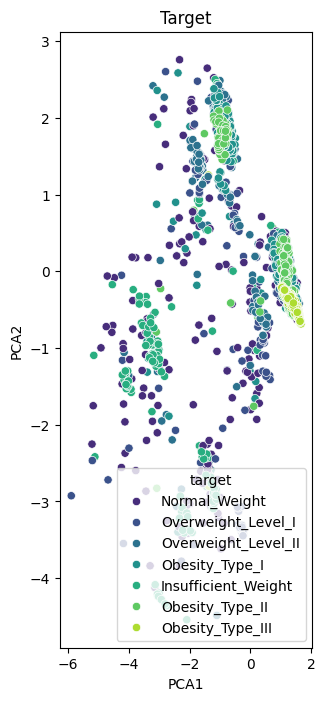

In [101]:
## Comparemos PCA con Target

results['target'] = y

plt.figure(figsize=(15, 8))

plt.subplot(1, 4, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='target', palette='viridis',  data=results)
plt.title('Target')

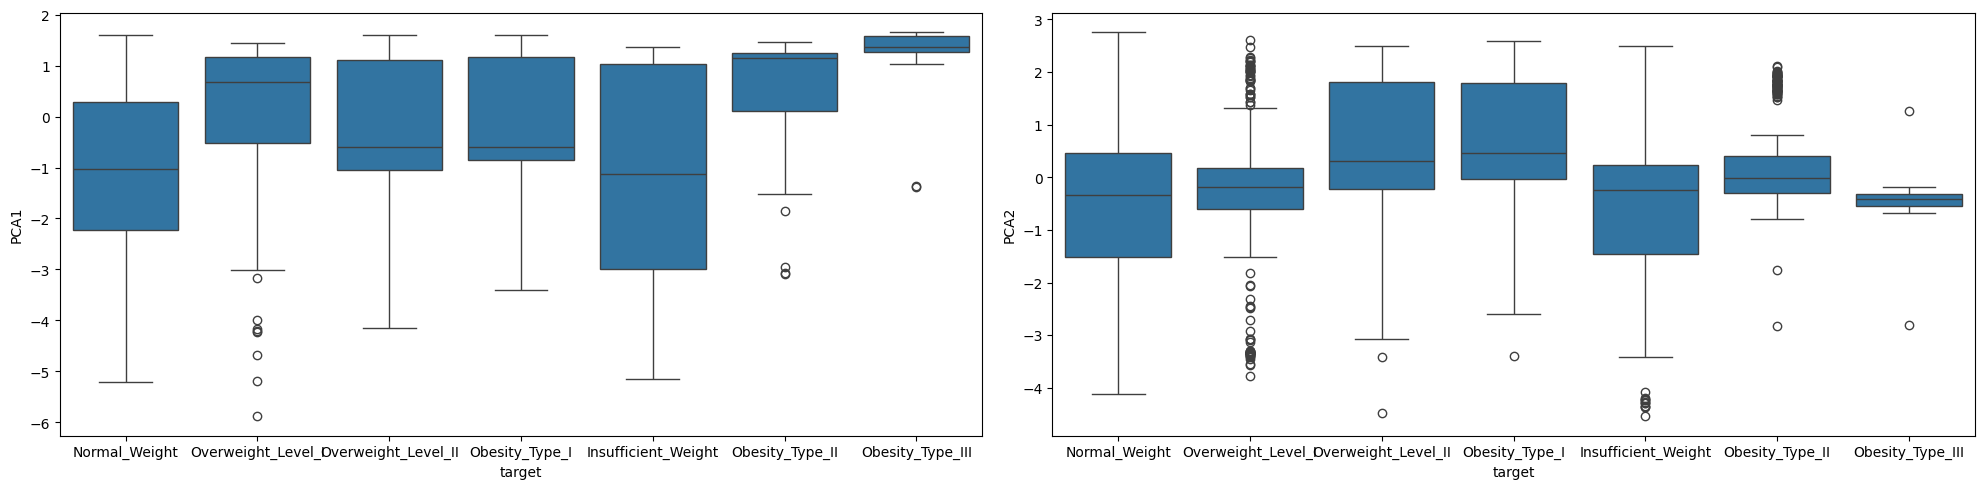

In [102]:
## Usemos un boxplot para comparar PCA con Target

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='PCA1', data=results)

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='PCA2', data=results)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'K-Means')

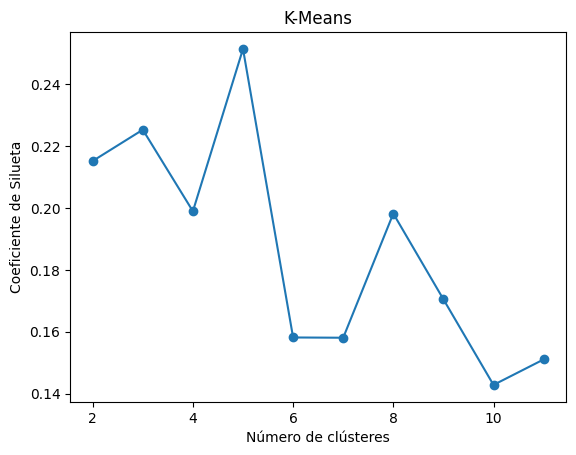

In [103]:
kmeans_silhouette = []
for k in range(10):
    kmeans = KMeans(n_clusters=k+2, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_scaled)
    silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
    kmeans_silhouette.append(silhouette_kmeans)

plt.plot(range(2, 12), kmeans_silhouette, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.title('K-Means')

### CONCLUSIONES
Dentro de los 2 escenarios planteados y de acuerdo con las variables tratadas, podemos identificar que el Escenario 1 presenta una mejor distribución de los cluster, agrupando de mejor manera a cada uno de los individuos, por lo que se concluye que al incluir la mayor cantidad de variables, el modelo muestra un mejor resultado. Al aplicar el método del Codo, logramos identificar el número de clusters apropiado, que para este caso fue 2.

En el Escenario 2 luego de aplicar el método del codo, no se logra identificar claramente la cantidad de cluster, por lo que inferimos tomar el número 5. 

De otra parte, se logra evidenciar que la reducción por dimensionalidad t-SNE presenta un mejor resultado que la reducción por dimensionalidad PCA. 